In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
patent_df = pd.read_csv(r"A:\DLSA\Project_work\Datasets\patent_df.csv").iloc[:, 1:]
works1 = pd.read_csv(r"A:\DLSA\Project_work\Datasets1\works.csv")
works1["id"] = works1["id"].astype(str).str.split(".org/").str[1]

In [11]:
standard_df = patent_df.merge(works1,left_on="paperid",right_on="id", how="left")

In [12]:
#standard_df1 = pd.read_csv("Datasets1/standard_df.csv").iloc[:, 1:]

In [13]:
#standard_df = pd.read_csv("Datasets1/standard_df.csv").iloc[:, 1:]

In [14]:
standard_df

,paperid,patent,label,id,title,abstract,cited_by_count,publication_year,language,type
0,W4286853979,US-10000390,1,W4286853979,Preparation of Silica Nanoparticles Through Mi...,Microwave-assisted synthetic techniques were u...,1.0,2013.0,en,article
1,W2086685806,US-10000390,1,W2086685806,Controlled Microwave-Assisted Growth of Silica...,"In this work, we demonstrate the controlled sy...",29.0,2012.0,en,article
2,W2006576711,US-10000410,1,W2006576711,Structure and properties of sodium aluminosili...,Addition of alumina to sodium silicate glasses...,173.0,2013.0,en,article
3,W1986737941,US-10000430,1,W1986737941,Design of a gas phase simulated moving bed for...,NaN,75.0,2008.0,en,article
4,W2066224895,US-10000430,1,W2066224895,Gas phase SMB for propane/propylene separation...,NaN,24.0,2013.0,en,article
...,...,...,...,...,...,...,...,...,...,...
190411,W4290887410,US-PP35015,1,W4290887410,Southern Highbush Blueberry Cultivars from the...,Many improved southern highbush cultivars have...,3.0,2014.0,en,article
190412,W4304731564,US-PP35015,1,W4304731564,Southern Highbush Blueberry Cultivars from the...,This publication provides historical backgroun...,4.0,2022.0,en,article
190413,W2735055015,US-PP35016,1,W2735055015,Effects of apple (Malus×domestica) rootstocks ...,NaN,54.0,2017.0,en,article
190414,W2550033686,US-PP35016,1,W2550033686,Cornell-Geneva Apple Rootstocks for Weak Growi...,Weak growing varieties like Honeycrisp and NY1...,2.0,2015.0,en,article


We do the EDA in 2 phase
1). Firstly with the merged dataset (in our form it is the standard_df)



Plotting a histogram to figure out how patents has evolved over time using the year

<function matplotlib.pyplot.show(close=None, block=None)>

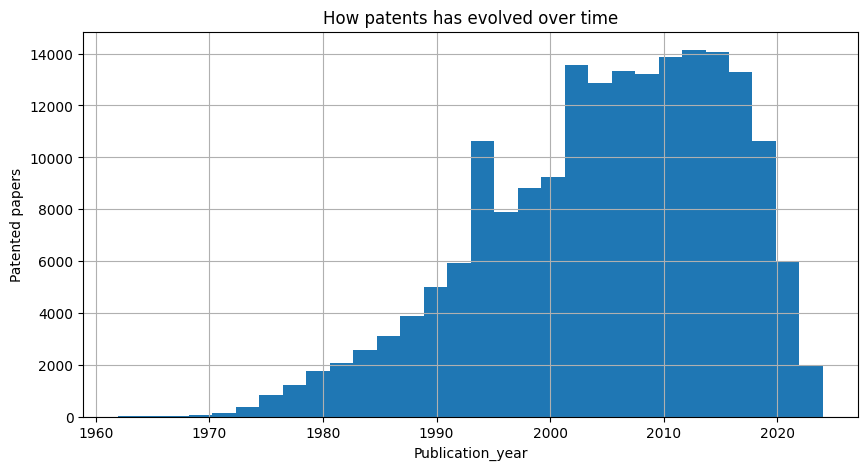

In [15]:
plt.figure(figsize=(10,5))
standard_df["publication_year"].dropna().hist(bins=30)
plt.xlabel("Publication_year")
plt.ylabel("Patented papers")
plt.title("How patents has evolved over time")
plt.show

Plotting whether the patented papers are highly cited using cited by count

<function matplotlib.pyplot.show(close=None, block=None)>

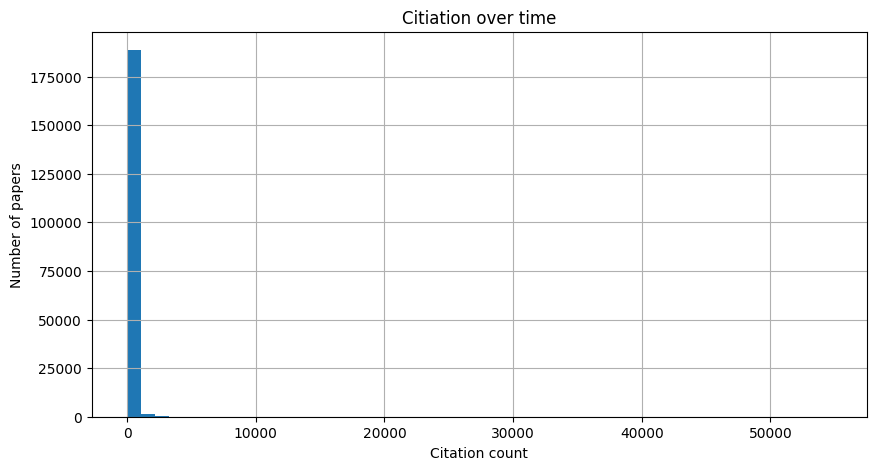

In [16]:
plt.figure(figsize=(10,5))
standard_df["cited_by_count"].dropna().hist(bins=50)
plt.xlabel("Citation count")
plt.ylabel("Number of papers")
plt.title("Citiation over time")
plt.show

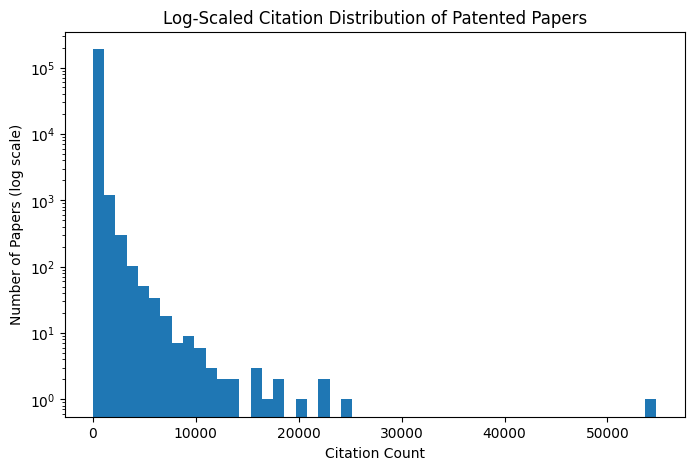

In [17]:
plt.figure(figsize=(8,5))
plt.hist(
    standard_df["cited_by_count"].dropna(),
    bins=50
)
plt.yscale("log")
plt.xlabel("Citation Count")
plt.ylabel("Number of Papers (log scale)")
plt.title("Log-Scaled Citation Distribution of Patented Papers")
plt.show()

What type of papers get patented

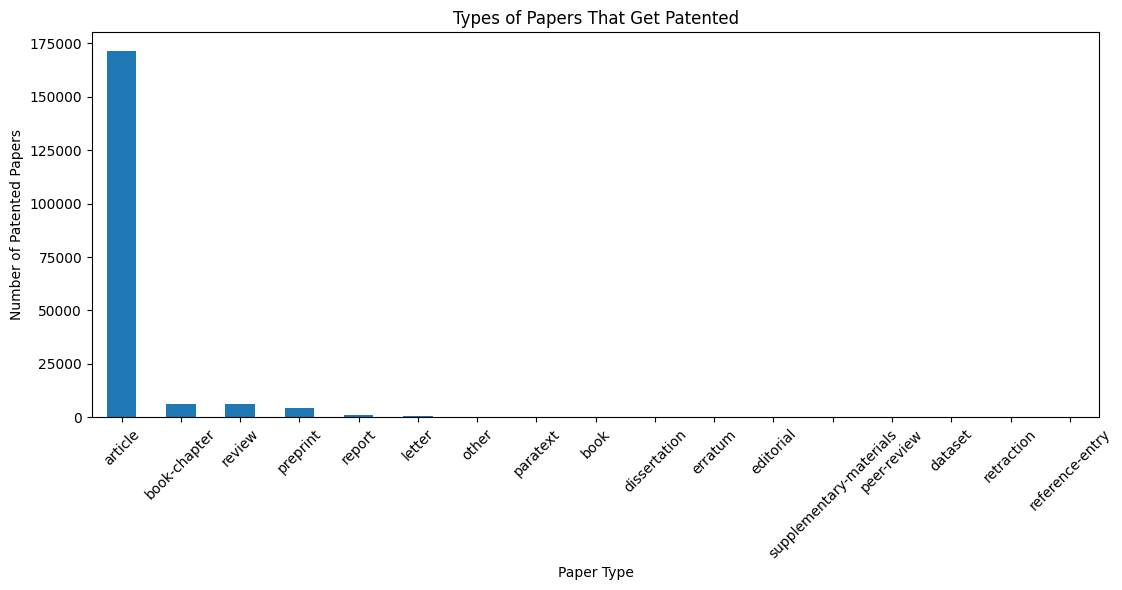

In [18]:
typeofpaper = standard_df["type"].value_counts()
plt.figure(figsize=(13,5))
typeofpaper.plot(kind="bar")
plt.xlabel("Paper Type")
plt.ylabel("Number of Patented Papers")
plt.title("Types of Papers That Get Patented")
plt.xticks(rotation=45)
plt.show()

In [19]:
typeofpaper.to_frame(name="count")

,count
type,
article,171665
book-chapter,6054
review,6005
preprint,4263
report,891
letter,481
other,279
paratext,217
book,211


Distribution of paper by language


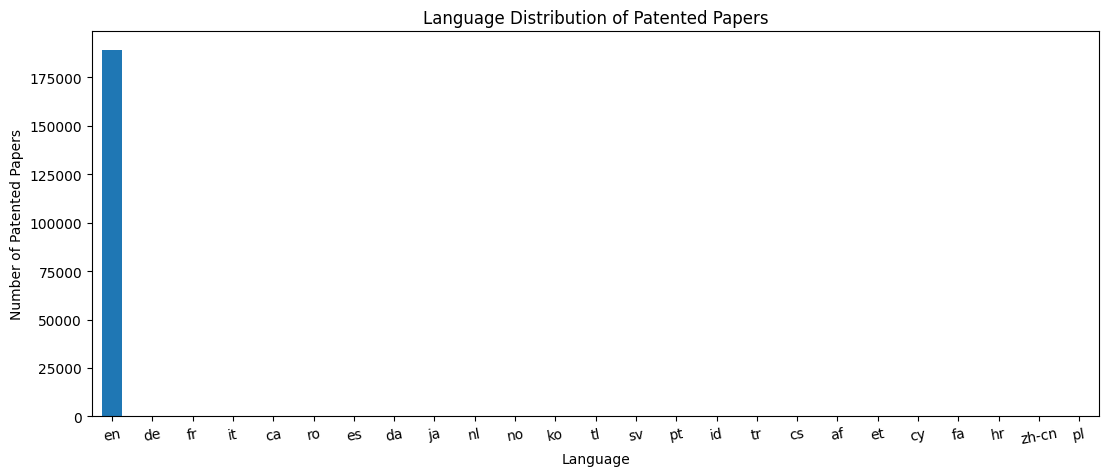

In [20]:
lang_counts = standard_df["language"].value_counts()
plt.figure(figsize=(13,5))
lang_counts.plot(kind="bar")
plt.xlabel("Language")
plt.ylabel("Number of Patented Papers")
plt.title("Language Distribution of Patented Papers")
plt.xticks(rotation=10)
plt.show()

In [21]:
lang_counts.to_frame(name="count")

,count
language,
en,189296
de,432
fr,195
it,70
ca,42
ro,38
es,27
da,22
ja,17


The above distribution allowed us to understand the distribution of patents over
1).Time
2).Impact type
3).Type of paper which is patented
4).Highest probable langauge which has patent

In [22]:
authors_df = pd.read_csv("Datasets1/authors.csv")
authors_df["id"] = authors_df["id"].str.split('.org/').str[1]
authors_df = authors_df.drop_duplicates(subset = "id")

In [23]:
authors_df

,id,orcid,display_name,display_name_alternatives,works_count,cited_by_count
0,A5060700231,NaN,Morando David,"['David Morando', 'Morando David']",4,16
1,A5057415906,NaN,Michael Levandoski,"['M. Levandoski', 'Michael Levandoski']",2,15
2,A5109151886,NaN,G‐F. Huang,['G‐F. Huang'],1,15
3,A5082284718,NaN,Craig A. MacDougall,['Craig A. MacDougall'],1,13
4,A5059703125,NaN,Paulene Quigley,['Paulene Quigley'],2,8
...,...,...,...,...,...,...
2075237,A5113962925,NaN,Aurora De Marco,['Aurora De Marco'],24,180
2075238,A5114083550,NaN,T. Kawachi,"['T. Kawachi', 'Tomomi Kawachi']",17,3
2075239,A5114162741,NaN,Jung Woo Ko,['Jung Woo Ko'],34,578
2075240,A5114240474,NaN,Samba Yandé Dieng,"['S. Dieng', 'Samba Yande ́ Dieng', 'Samba Yan...",34,208


In [24]:
works_auth_df= pd.read_csv("Datasets1/works_authorships.csv",low_memory = False)
works_auth_df["work_id"] = works_auth_df["work_id"].str.split('.org/').str[1]
works_auth_df["author_id"] = works_auth_df["author_id"].str.split('.org/').str[1]
works_auth_df["institution_id"]=works_auth_df["institution_id"].str.split('.org/').str[1]
works_auth_df

,work_id,author_position,author_id,institution_id,raw_affiliation_string
0,W2952758595,first,A5042675876,I146682468,NaN
1,W2952758595,middle,A5035503164,I146682468,NaN
2,W2952758595,middle,A5090526068,I146682468,NaN
3,W2952758595,middle,A5114250840,I146682468,NaN
4,W2952758595,last,A5084954124,I146682468,NaN
...,...,...,...,...,...
4987529,W2771774654,middle,A5012876740,I385303915,NaN
4987530,W2771774654,middle,A5108098629,I83558840,NaN
4987531,W2771774654,middle,A5053582456,I385303915,NaN
4987532,W2771774654,middle,A5030570702,I385303915,NaN


In [25]:
author_work_merge = works_auth_df.merge(authors_df,left_on = "author_id",right_on = "id",how="left")
author_work_merge = author_work_merge.drop(columns = ["id"])
#author_work_merge.head(2)

In [26]:
authors_eda_df = author_work_merge.merge(standard_df,left_on="work_id",right_on="paperid",how="inner")

In [27]:
authors_eda_df = authors_eda_df.drop(columns = ["work_id","display_name_alternatives","raw_affiliation_string","orcid","display_name","patent",
                                                "label","title","abstract","cited_by_count_y","language","type"])
#authors_eda_df.head(2)

In [28]:
authors_eda_df["institution_id"] = authors_eda_df["institution_id"].str.split('.org/').str[1]

In [29]:
authors_eda_df

,author_position,author_id,institution_id,works_count,cited_by_count_x,paperid,id,publication_year
0,first,A5042675876,NaN,18.0,380.0,W2952758595,W2952758595,2015.0
1,middle,A5035503164,NaN,129.0,2225.0,W2952758595,W2952758595,2015.0
2,middle,A5090526068,NaN,28.0,544.0,W2952758595,W2952758595,2015.0
3,middle,A5114250840,NaN,11.0,303.0,W2952758595,W2952758595,2015.0
4,last,A5084954124,NaN,41.0,711.0,W2952758595,W2952758595,2015.0
...,...,...,...,...,...,...,...,...
1262564,middle,A5022544651,NaN,111.0,1191.0,W2605536226,W2605536226,2017.0
1262565,middle,A5101724743,NaN,98.0,404.0,W2605536226,W2605536226,2017.0
1262566,middle,A5063593114,NaN,59.0,1681.0,W2605536226,W2605536226,2017.0
1262567,middle,A5113780592,NaN,61.0,604.0,W2605536226,W2605536226,2017.0


This dataset can be used for authors level EDA 

1). Finding how large teams are behind patented science

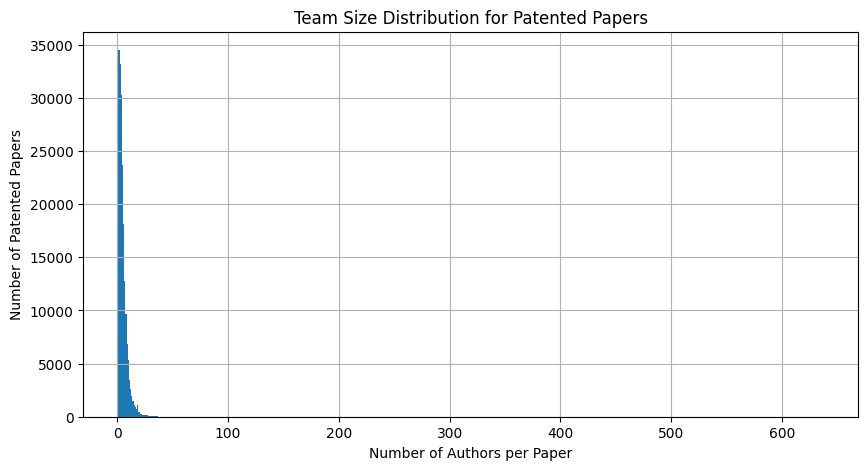

In [30]:
t_size = authors_eda_df.groupby("paperid")["author_id"].nunique()
plt.figure(figsize=(10,5))
t_size.hist(bins=600)
plt.xlabel("Number of Authors per Paper")
plt.ylabel("Number of Patented Papers")
plt.title("Team Size Distribution for Patented Papers")
plt.show()

In [31]:
t_size.to_frame(name="count").nlargest(n=10, columns="count")

,count
paperid,
W4229536675,637
W2104549677,476
W3185856353,426
W3083297478,422
W3107659842,260
W3205453674,175
W2029563076,174
W1993904263,164
W2035310463,155


In [32]:
t_size.describe()

count    190312.000000
mean          5.471736
std           4.865700
min           1.000000
25%           3.000000
50%           4.000000
75%           7.000000
max         637.000000
Name: author_id, dtype: float64

Productivity of the authors (are the authors really renowned)

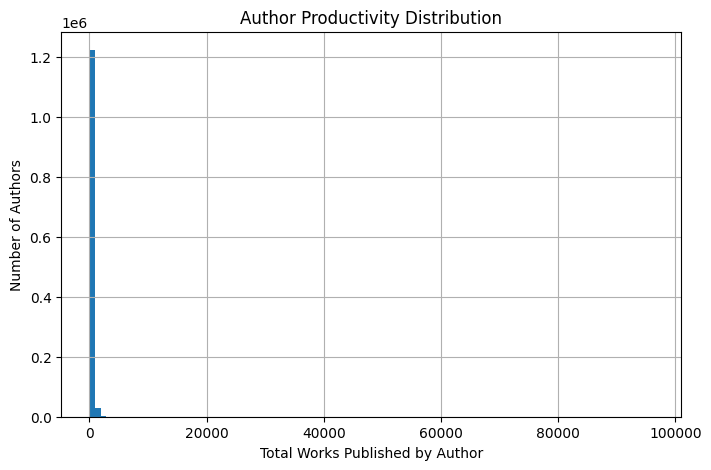

In [33]:
plt.figure(figsize=(8,5))
authors_eda_df["works_count"].dropna().hist(bins=100)
plt.xlabel("Total Works Published by Author")
plt.ylabel("Number of Authors")
plt.title("Author Productivity Distribution")
plt.show()

Are the authors who have patented paper highly cited

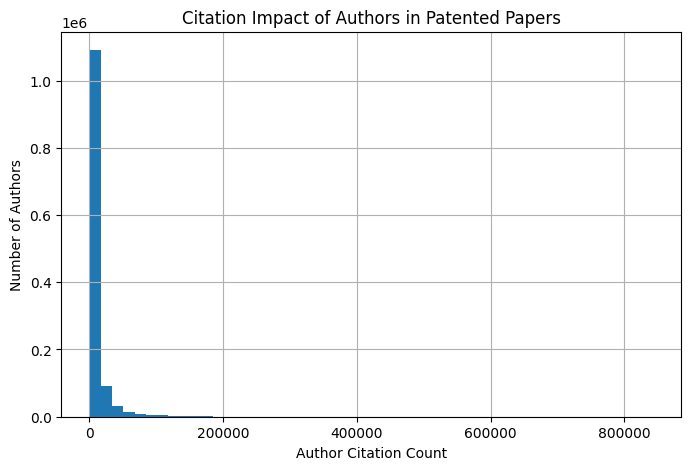

In [34]:
plt.figure(figsize=(8,5))
authors_eda_df["cited_by_count_x"].dropna().hist(bins=50)
plt.xlabel("Author Citation Count")
plt.ylabel("Number of Authors")
plt.title("Citation Impact of Authors in Patented Papers")
plt.show()

Which position is mostly bound for patents

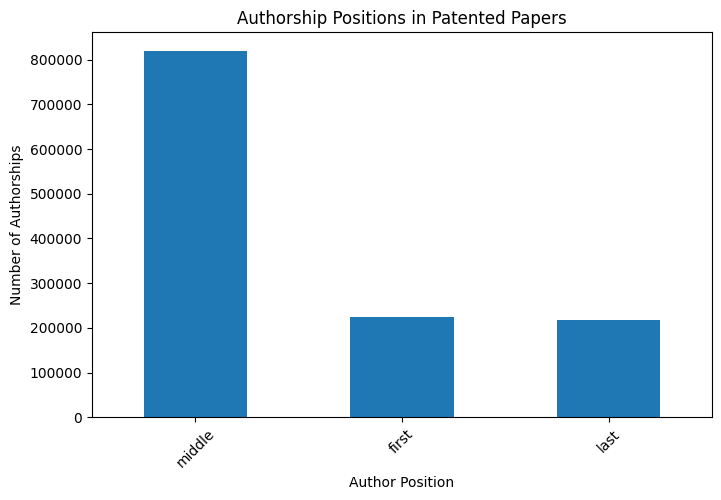

In [35]:
pos_counts = authors_eda_df["author_position"].value_counts()

plt.figure(figsize=(8,5))
pos_counts.plot(kind="bar")
plt.xlabel("Author Position")
plt.ylabel("Number of Authorships")
plt.title("Authorship Positions in Patented Papers")
plt.xticks(rotation=45)
plt.show()

We find if the teams are getting larger over time 

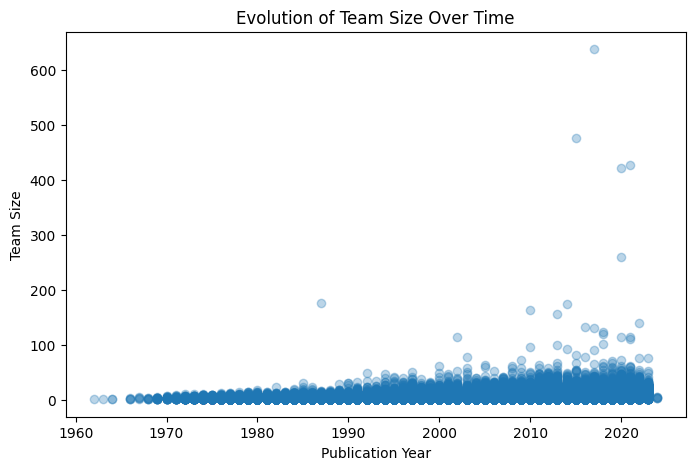

In [36]:
paper_year = authors_eda_df.groupby("paperid")["publication_year"].first()
plt.figure(figsize=(8,5))
plt.scatter(paper_year, t_size, alpha=0.3)
plt.xlabel("Publication Year")
plt.ylabel("Team Size")
plt.title("Evolution of Team Size Over Time")
plt.show()

In [37]:
institutions_df = pd.read_csv("Datasets1/institutions.csv")
institutions_df["id"] = institutions_df["id"].str.split('.org/').str[1]
institutions_df = institutions_df.drop_duplicates(subset = "id")
institutions_df

,id,display_name,country_code,works_count,cited_by_count
0,I86519309,The University of Texas at Austin,US,248830,9643619
1,I187531555,Lund University,SE,195170,7256538
2,I159176309,Universität Hamburg,DE,176599,4835222
3,I59553526,Stony Brook University,US,110024,4409209
4,I36399199,Nanjing University of Science and Technology,CN,66892,1056534
...,...,...,...,...,...
72085,I4210130469,Logistic Gliders (United States),US,1,1
72086,I4210124734,LEV Foundation,US,1,0
72087,I4210125975,Troms Fylkeskommune,NO,6,0
72088,I4210165947,Jagadguru Ramanandacharya Rajasthan Sanskrit U...,IN,10,0


Institutional level EDA

In [38]:
#institutions_df
#works_auth_df
#standard_df
works_auth_df_temp = works_auth_df[["work_id","institution_id"]].dropna()

In [39]:
# merge patents datasets with authorships

auth_patents_merge_df = works_auth_df_temp.merge(standard_df[["paperid","publication_year"]],left_on="work_id",right_on="paperid",how="inner")

In [40]:
# merge the above dataset with the institutions df

institutions_auth_patents_df = auth_patents_merge_df.merge(institutions_df,left_on="institution_id",right_on="id",how="left")
institutions_auth_patents_df = institutions_auth_patents_df.drop(columns = ["work_id","id"])

We can use this dataset to create institution level EDA


Top institutes by patented paper count

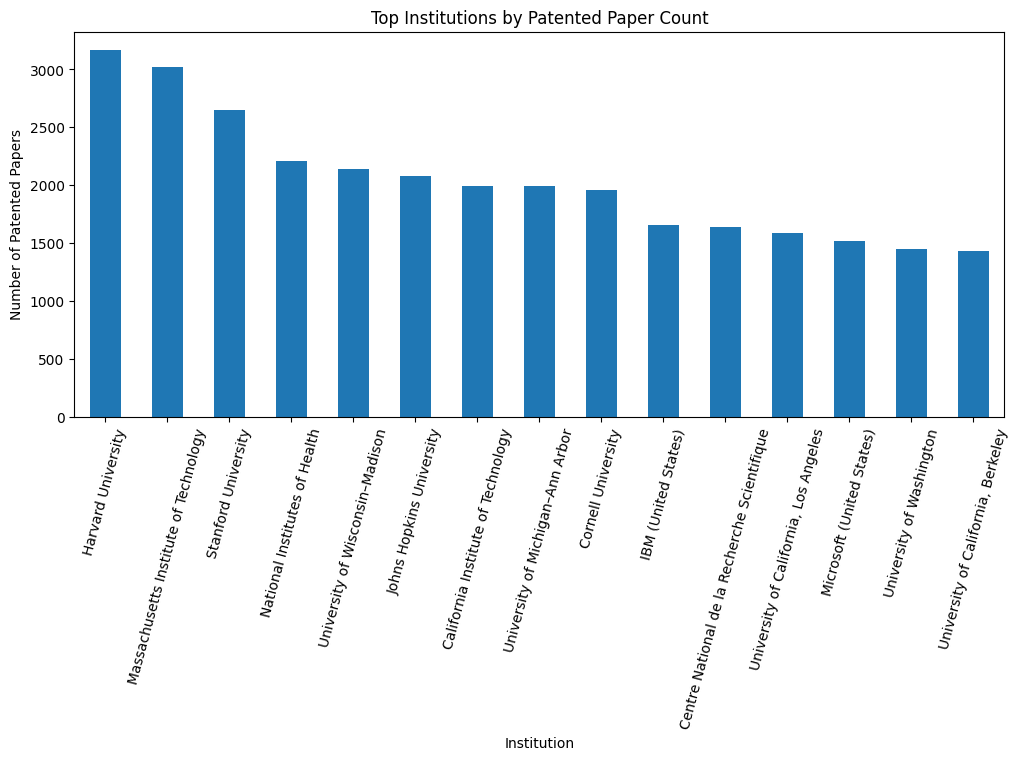

In [41]:
#top_institutions = (institutions_auth_patents_df.groupby("display_name")["paperid"].nunique())
top_institutions = (institutions_auth_patents_df.groupby("display_name")["paperid"].nunique().sort_values(ascending=False).head(15))
top_institutions.plot(kind="bar", figsize=(12,5))
plt.xlabel("Institution")
plt.ylabel("Number of Patented Papers")
plt.title("Top Institutions by Patented Paper Count")
plt.xticks(rotation=75)
plt.show()

Country level distribution of patented science

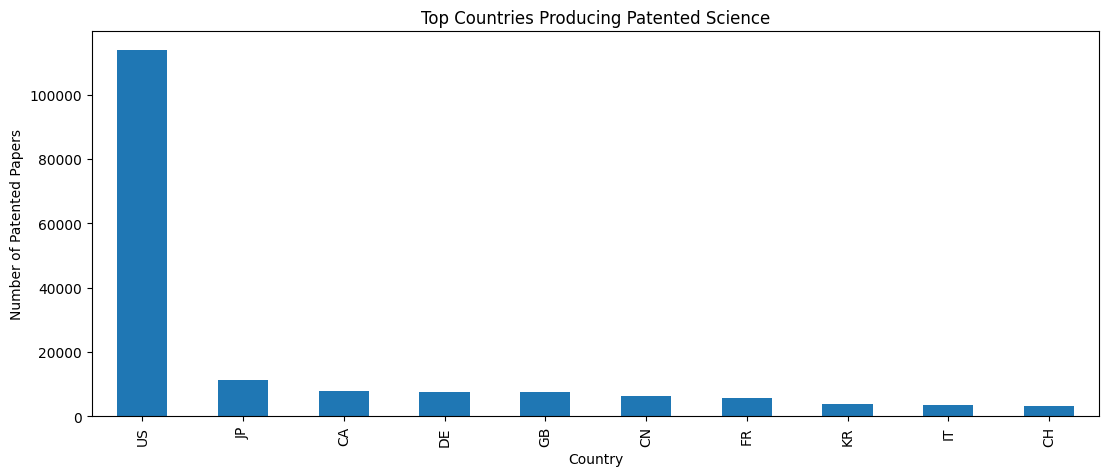

In [42]:
country_dist = (institutions_auth_patents_df.groupby("country_code")["paperid"].nunique().sort_values(ascending=False))
country_dist.head(10).plot(kind="bar", figsize=(13,5))
plt.xlabel("Country")
plt.ylabel("Number of Patented Papers")
plt.title("Top Countries Producing Patented Science")
plt.show()

Evolution of institutions partcipation over time

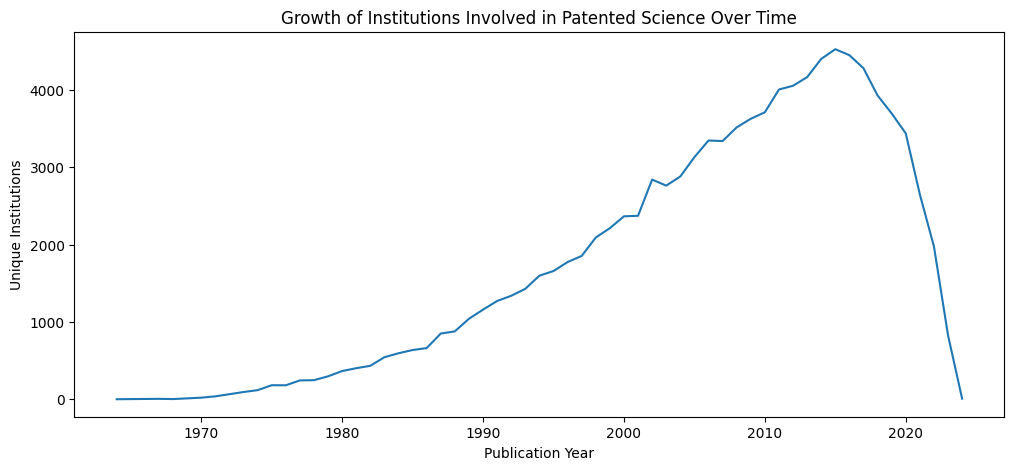

In [43]:
inst_over_time = (institutions_auth_patents_df.groupby("publication_year")["institution_id"].nunique())
inst_over_time.plot(figsize=(12,5))
plt.xlabel("Publication Year")
plt.ylabel("Unique Institutions")
plt.title("Growth of Institutions Involved in Patented Science Over Time")
plt.show()

Topic Level EDA

In [44]:
topics_df=pd.read_csv("Datasets1/topics.csv")
topics_df["id"] = topics_df["id"].str.split('.org/').str[1]
topics_temp_df=topics_df[["id","display_name","domain_display_name","field_display_name"]]
topics_temp_df = topics_temp_df.drop_duplicates(subset="id")

In [45]:
works_topics_df=pd.read_csv("Datasets1/works_topics.csv")
works_topics_df["work_id"] = works_topics_df["work_id"].str.split('.org/').str[1]
works_topics_df["topic_id"] = works_topics_df["topic_id"].str.split('.org/').str[1]
works_topics_temp_df = works_topics_df.drop_duplicates(subset=["work_id","topic_id"])
works_topics_temp_df

,work_id,topic_id,score
0,W4301809645,T10078,0.9566
1,W2020387650,T10602,0.9999
2,W2020387650,T10340,0.9986
3,W2020387650,T12387,0.9961
4,W2121748871,T10378,1.0000
...,...,...,...
2200779,W4251281890,T10520,0.9372
2200780,W4251281890,T10252,0.9260
2200781,W4254508858,T10436,0.9991
2200782,W4254508858,T11930,0.9968


In [46]:
topics_temp_df

,id,display_name,domain_display_name,field_display_name
0,T12760,Electric Discharge Pumped Lasers,Physical Sciences,Engineering
1,T13293,Fault Diagnosis in Complex Systems,Physical Sciences,Engineering
2,T10932,Metabolic Engineering and Synthetic Biology,Life Sciences,"Biochemistry, Genetics and Molecular Biology"
3,T14303,Synthesis and Characterization of Polymer Resins,Physical Sciences,Materials Science
4,T11801,Advanced Techniques in Reservoir Management,Physical Sciences,Engineering
...,...,...,...,...
4100,T13344,Applications of Programmable Logic Controllers...,Physical Sciences,Engineering
4101,T12743,Memory and Modernity in Democratic Spain,Social Sciences,Arts and Humanities
4102,T13948,European Union Immigration and Asylum Policies,Social Sciences,Social Sciences
4103,T10839,Pancreatic Islet Dysfunction and Regeneration,Health Sciences,Medicine


In [47]:
# merge works_topic and standard_df
works_topic_merge_df = works_topics_temp_df.merge(standard_df[["paperid","publication_year"]],left_on="work_id",right_on="paperid",how="inner")

In [48]:
#merge the above dataset with topics_df
topic_eda_df = works_topic_merge_df.merge(topics_df,left_on="topic_id",right_on="id",how="left")
topic_eda_df

,work_id,topic_id,score,paperid,publication_year,id,display_name,description,domain_display_name,field_display_name,keywords
0,W4301809645,T10078,0.9566,W4301809645,2018.0,T10078,Photocatalytic Materials for Solar Energy Conv...,This cluster of papers covers advances in the ...,Physical Sciences,Energy,Photocatalyst; Semiconductor; Visible Light; W...
1,W2020387650,T10602,0.9999,W2020387650,2006.0,T10602,Glycosylation in Health and Disease,This cluster of papers explores the diverse ro...,Life Sciences,"Biochemistry, Genetics and Molecular Biology",Glycosylation; Glycans; Cancer; Immune System;...
2,W2020387650,T10340,0.9986,W2020387650,2006.0,T10340,Hepatitis B Infection and Treatment,This cluster of papers focuses on the epidemio...,Health Sciences,Medicine,Hepatitis B Virus; Chronic Hepatitis B; Viral ...
3,W2020387650,T12387,0.9961,W2020387650,2006.0,T12387,Role of Galectins in Immunity and Disease,This cluster of papers explores the diverse ro...,Life Sciences,Immunology and Microbiology,Galectins; Immune Regulation; Inflammation; Ca...
4,W2121748871,T10378,1.0000,W2121748871,2007.0,T10378,Magnetic Resonance Imaging Applications in Med...,This cluster of papers covers a wide range of ...,Health Sciences,Medicine,Magnetic Resonance Imaging; Perfusion Imaging;...
...,...,...,...,...,...,...,...,...,...,...,...
553695,W51603562,T10334,0.9985,W51603562,2009.0,T10334,Cochlear Neuropathy and Hearing Loss Mechanisms,This cluster of papers explores the mechanisms...,Life Sciences,Neuroscience,Cochlear Neuropathy; Hearing Loss; Tinnitus; H...
553696,W51603562,T11692,0.9972,W51603562,2009.0,T11692,Effects of Noise Pollution on Health and Well-...,This cluster of papers explores the diverse ef...,Health Sciences,Health Professions,Noise Pollution; Health Effects; Environmental...
553697,W2919197618,T10566,0.9940,W2919197618,2019.0,T10566,Attosecond Physics and Optics,This cluster of papers represents the cutting-...,Physical Sciences,Physics and Astronomy,Attosecond Physics; High-Harmonic Generation; ...
553698,W2919197618,T12760,0.9916,W2919197618,2019.0,T12760,Electric Discharge Pumped Lasers,This cluster of papers focuses on the developm...,Physical Sciences,Engineering,Electric Discharge; Laser Oscillation; Atomic ...


Which topics appear most often in patented papers

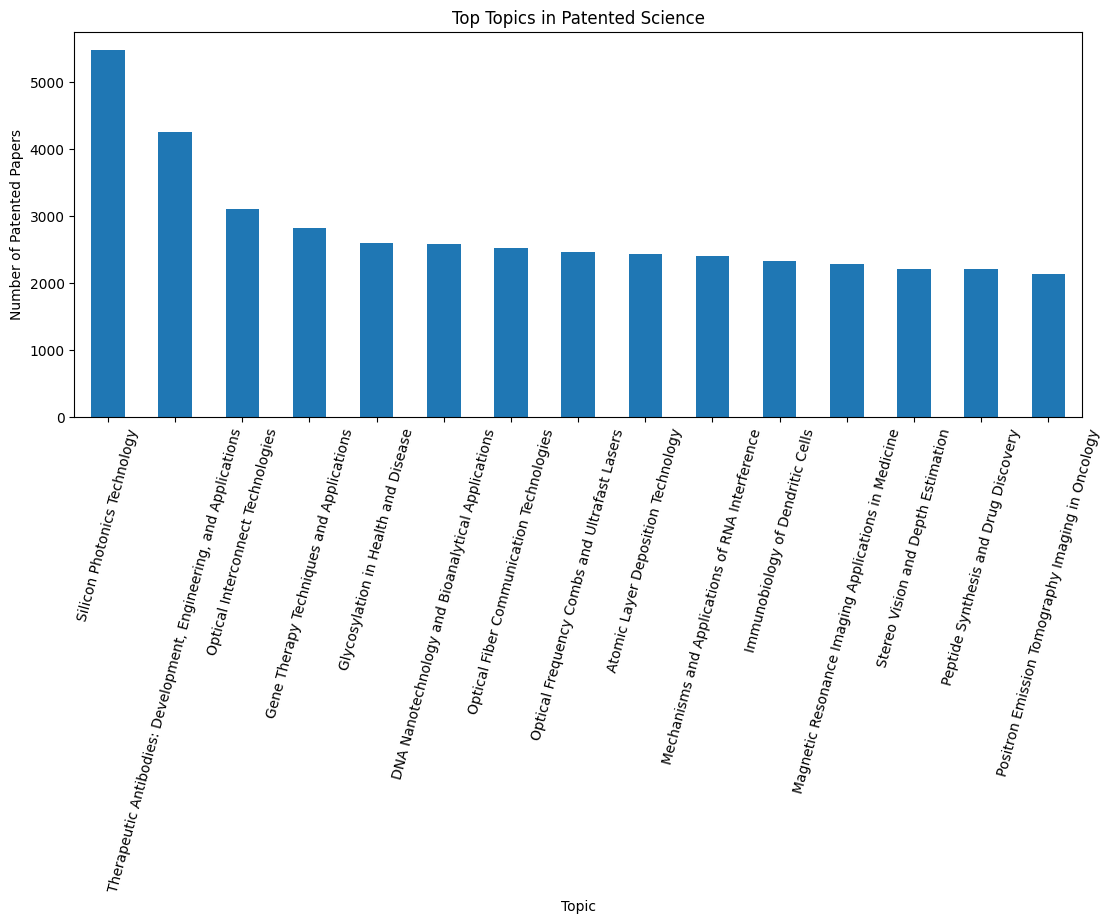

In [49]:
top_topics = (topic_eda_df.groupby("display_name")["paperid"].nunique().sort_values(ascending=False).head(15))
top_topics.plot(kind="bar", figsize=(13,5))
plt.xlabel("Topic")
plt.ylabel("Number of Patented Papers")
plt.title("Top Topics in Patented Science")
plt.xticks(rotation=75)
plt.show()

Which domain dominates patented science

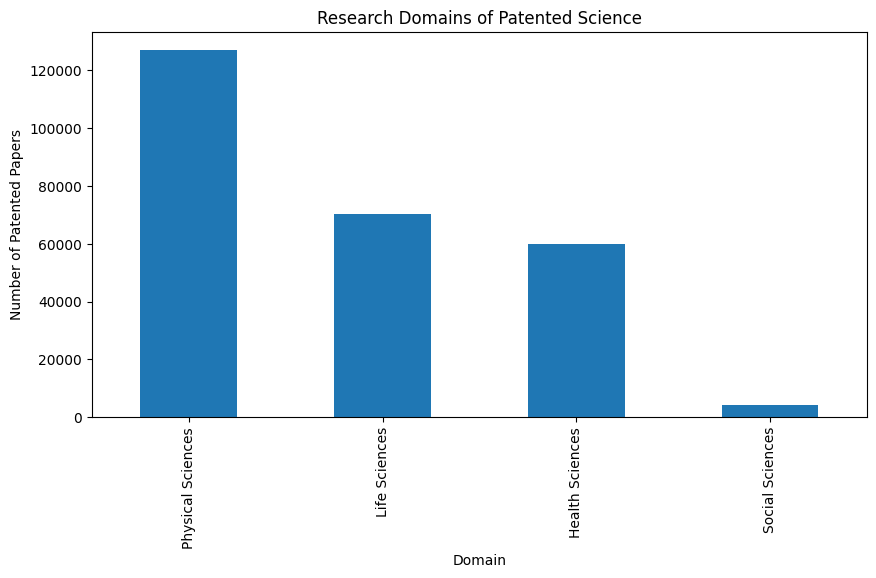

In [50]:
domain_dist = (topic_eda_df.groupby("domain_display_name")["paperid"].nunique().sort_values(ascending=False))
domain_dist.plot(kind="bar", figsize=(10,5))
plt.xlabel("Domain")
plt.ylabel("Number of Patented Papers")
plt.title("Research Domains of Patented Science")
plt.show()

Which field is highly distributed

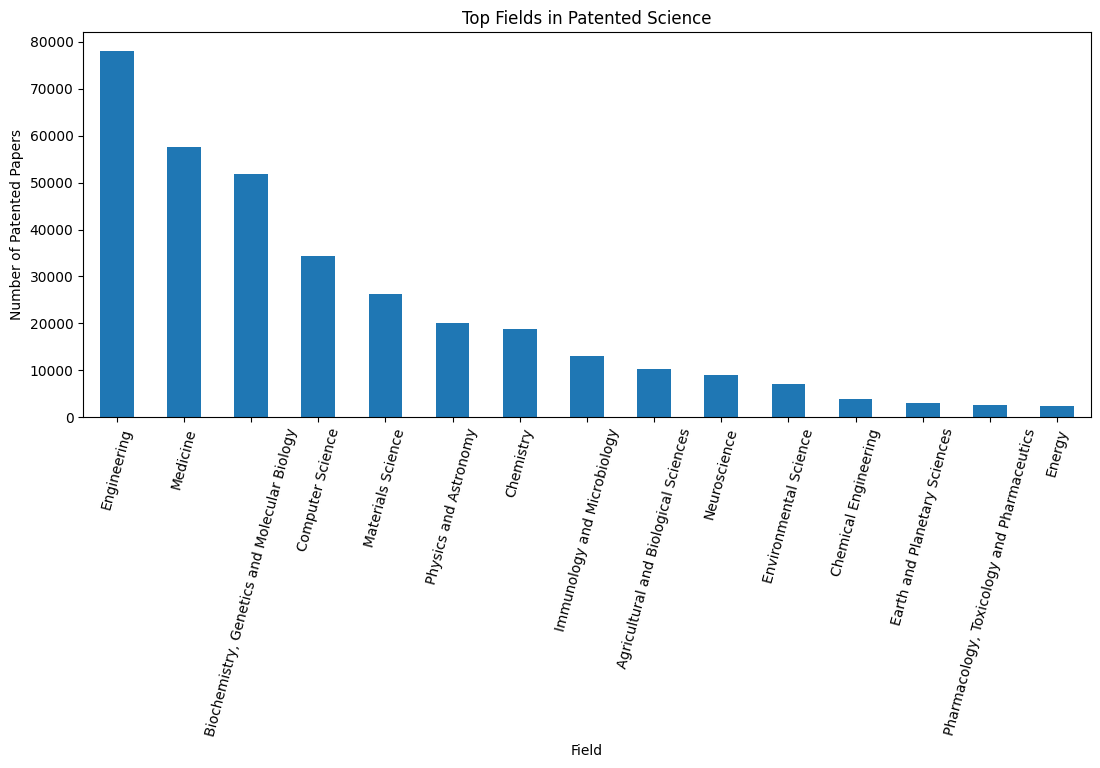

In [51]:
field_dist = (topic_eda_df.groupby("field_display_name")["paperid"].nunique().sort_values(ascending=False).head(15))
field_dist.plot(kind="bar", figsize=(13,5))
plt.xlabel("Field")
plt.ylabel("Number of Patented Papers")
plt.title("Top Fields in Patented Science")
plt.xticks(rotation=75)
plt.show()

topic which trends over time

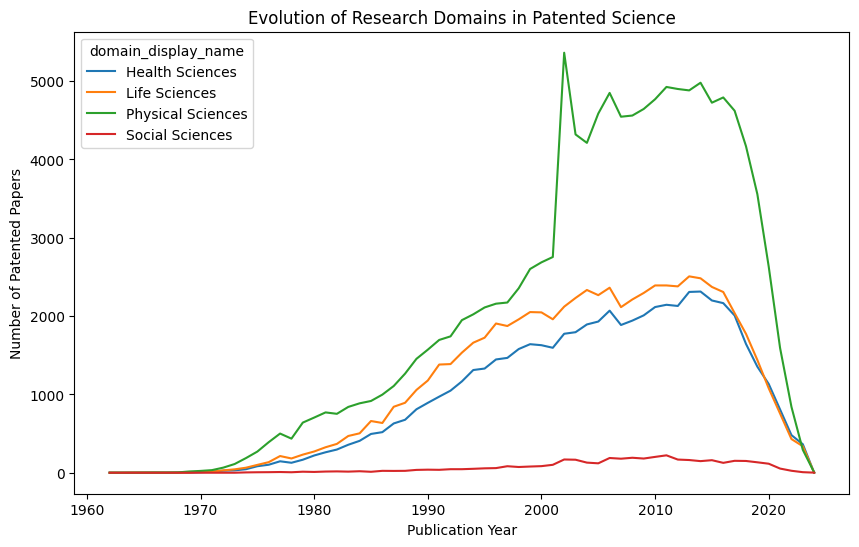

In [52]:
topic_time = (topic_eda_df.groupby(["publication_year", "domain_display_name"])["paperid"].nunique().reset_index())
pivot_topic_time = topic_time.pivot(index="publication_year",columns="domain_display_name",values="paperid").fillna(0)
pivot_topic_time.plot(figsize=(10,6))
plt.xlabel("Publication Year")
plt.ylabel("Number of Patented Papers")
plt.title("Evolution of Research Domains in Patented Science")
plt.show()

general description stats

In [53]:
topic_eda_df["score"].describe()

count    553700.000000
mean          0.987415
std           0.043702
min           0.040000
25%           0.991100
50%           0.997700
75%           0.999600
max           1.000000
Name: score, dtype: float64

In [54]:
works_conc_df=pd.read_csv("Datasets1/works_concepts.csv")
works_conc_df["work_id"] = works_conc_df["work_id"].str.split('.org/').str[1]
works_conc_df["concept_id"] = works_conc_df["concept_id"].str.split('.org/').str[1]

In [55]:
concepts_df=pd.read_csv("Datasets1/concepts.csv")
concepts_df["id"] = concepts_df["id"].str.split('.org/').str[1]

In [56]:
#merge the works_concepts_df with the standard dataset
concepts_merge_df=works_conc_df.merge(standard_df[["paperid","publication_year"]],left_on="work_id",right_on="paperid",how="inner")

In [57]:
#merge the above dataset with the concepts dataset
concept_eda_df = concepts_merge_df.merge(concepts_df,left_on="concept_id",right_on="id",how="left")
concept_eda_df = concept_eda_df.drop(columns=["id","work_id"])
concept_eda_df

,concept_id,score,paperid,publication_year,display_name,level,description,works_count,cited_by_count
0,C2779212266,0.985496,W2020387650,2006.0,Fucosylation,4,The covalent attachment of a fucosyl group to ...,3099,102066
1,C2778019345,0.850981,W2020387650,2006.0,Hepatocellular carcinoma,2,liver carcinoma that has material basis in und...,210230,4148881
2,C108625454,0.793310,W2020387650,2006.0,Glycoprotein,2,protein with oligosaccaride modifications,121858,4311780
3,C2776231280,0.603536,W2020387650,2006.0,Liver cancer,3,human disease,40335,950949
4,C2777313579,0.518250,W2020387650,2006.0,Glycosylation,2,covalent attachment and further modification o...,45169,1466517
...,...,...,...,...,...,...,...,...,...
2971334,C71924100,0.331181,W51603562,2009.0,Medicine,0,"field of study for diagnosing, treating and pr...",63435690,820803355
2971335,C169760540,0.323581,W51603562,2009.0,Neuroscience,1,scientific study of the central nervous system,5618894,137558576
2971336,C121332964,0.097923,W51603562,2009.0,Physics,0,"study of matter and its motion, along with rel...",43527873,575686845
2971337,C141071460,0.095574,W51603562,2009.0,Surgery,1,medical specialty,8602809,121321910


We can use the above dataset for Concept level EDA

1). Most frequent concepts in patented papers

In [58]:
top_concepts = (concept_eda_df.groupby("display_name")["paperid"].nunique().sort_values(ascending=False).head(15))
top_concepts

display_name
Computer science           73116
Chemistry                  68286
Biology                    68032
Physics                    62792
Materials science          55437
Medicine                   46669
Biochemistry               46202
Engineering                45532
Gene                       33638
Optics                     31625
Organic chemistry          30662
Artificial intelligence    29510
Genetics                   28545
Mathematics                27534
Quantum mechanics          25956
Name: paperid, dtype: int64

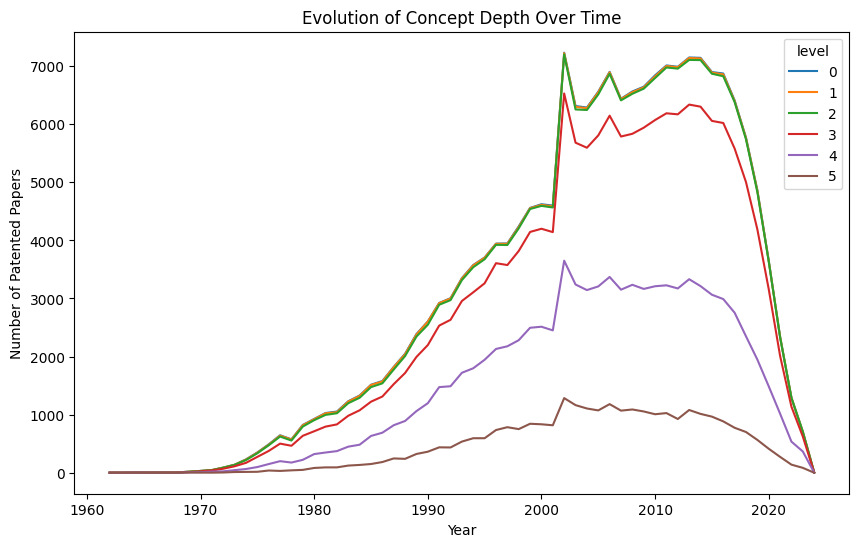

In [59]:
concept_time = (concept_eda_df.groupby(["publication_year", "level"])["paperid"].nunique().reset_index())
pivot_concept_time = concept_time.pivot(index="publication_year",columns="level",values="paperid").fillna(0)
pivot_concept_time.plot(figsize=(10,6))
plt.xlabel("Year")
plt.ylabel("Number of Patented Papers")
plt.title("Evolution of Concept Depth Over Time")
plt.show()